In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = {
    "data1": pd.read_csv("../files/data1.tsv", sep="\t", header=None, index_col=False, names=["x", "y"]),
    "data2": pd.read_csv("../files/data2.tsv", sep="\t", header=None, index_col=False, names=["x", "y"]),
    "data3": pd.read_csv("../files/data3.tsv", sep="\t", header=None, index_col=False, names=["x", "y"]),
    "data4": pd.read_csv("../files/data4.tsv", sep="\t", header=None, index_col=False, names=["x", "y"]),
}

## Calculating mean

In [3]:
for k, d in data.items():
    print(k)
    print(f"x={np.mean(d.x):.2f}, y={np.mean(d.y):.2f}")

data1
x=9.00, y=7.50
data2
x=9.00, y=7.50
data3
x=9.00, y=7.50
data4
x=9.00, y=7.50


## Calculating 

In [4]:
for k, d in data.items():
    print(k)
    print(f"x={np.var(d.x):.3f}, y={np.var(d.y):.3f}")

data1
x=10.000, y=3.752
data2
x=10.000, y=3.752
data3
x=10.000, y=3.748
data4
x=10.000, y=3.748


In [5]:
for k, d in data.items():
    print(k)
    print(f"Pearrson cov = {np.corrcoef(d.x, d.y)}")

data1
Pearrson cov = [[1.         0.81642052]
 [0.81642052 1.        ]]
data2
Pearrson cov = [[1.         0.81623651]
 [0.81623651 1.        ]]
data3
Pearrson cov = [[1.         0.81628674]
 [0.81628674 1.        ]]
data4
Pearrson cov = [[1.         0.81652144]
 [0.81652144 1.        ]]


## Linear Regression

In [6]:
from scipy import stats

In [7]:
for k, d in data.items():
    slope, intercept, r_value, p_value, std_err = stats.linregress(d.x, d.y)
    print(k)
    print(f"{slope=:.2f}, {intercept=:.2f}")

data1
slope=0.50, intercept=3.00
data2
slope=0.50, intercept=3.00
data3
slope=0.50, intercept=3.00
data4
slope=0.50, intercept=3.00


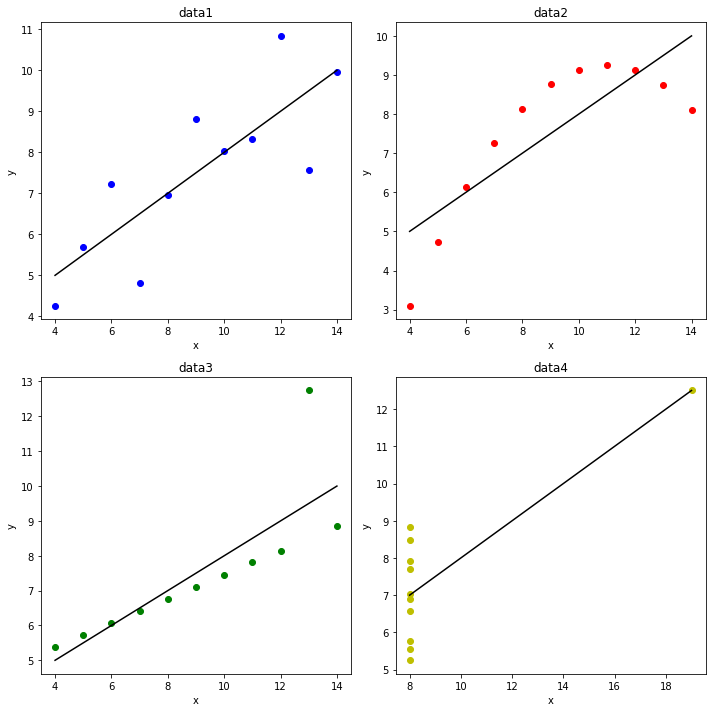

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

cols = ["b", "r", "g", "y"]
for (k, d), ax, col in zip(data.items(), axs.flatten(), cols):
    ax.scatter(d.x, d.y, color=col)

    slope, intercept, r_value, p_value, std_err = stats.linregress(d.x, d.y)
    x = np.linspace(np.min(d.x), np.max(d.x))
    y = slope * x + intercept
    ax.plot(x, y, "black")
    ax.set_title(k)


for ax in axs.flatten():
    ax.set_xlabel("x")
    ax.set_ylabel("y")
plt.tight_layout()

## Part 1.2
*Excercise 1.2:* Questions for the lecture
* What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?
    * Data is concrete, metadata is data about the data
* Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
    * I agree, its real good. Good at spotting patterns, can be confused.
* Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
    * The schoolsystem in America
* In your own words, explain the differnece between *exploratory* and *explanatory* data analysis. 
    * Explore the data or explain the data

In [9]:
df = pd.read_csv("../data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

In [10]:
df["DayName"] = pd.to_datetime(df.Date).dt.day_name()
df["WeekIdx"] = pd.to_datetime(df.Date).dt.weekday
df["Month"] = pd.to_datetime(df.Date).dt.month
df["Hour"] = pd.to_datetime(df.Time).dt.hour

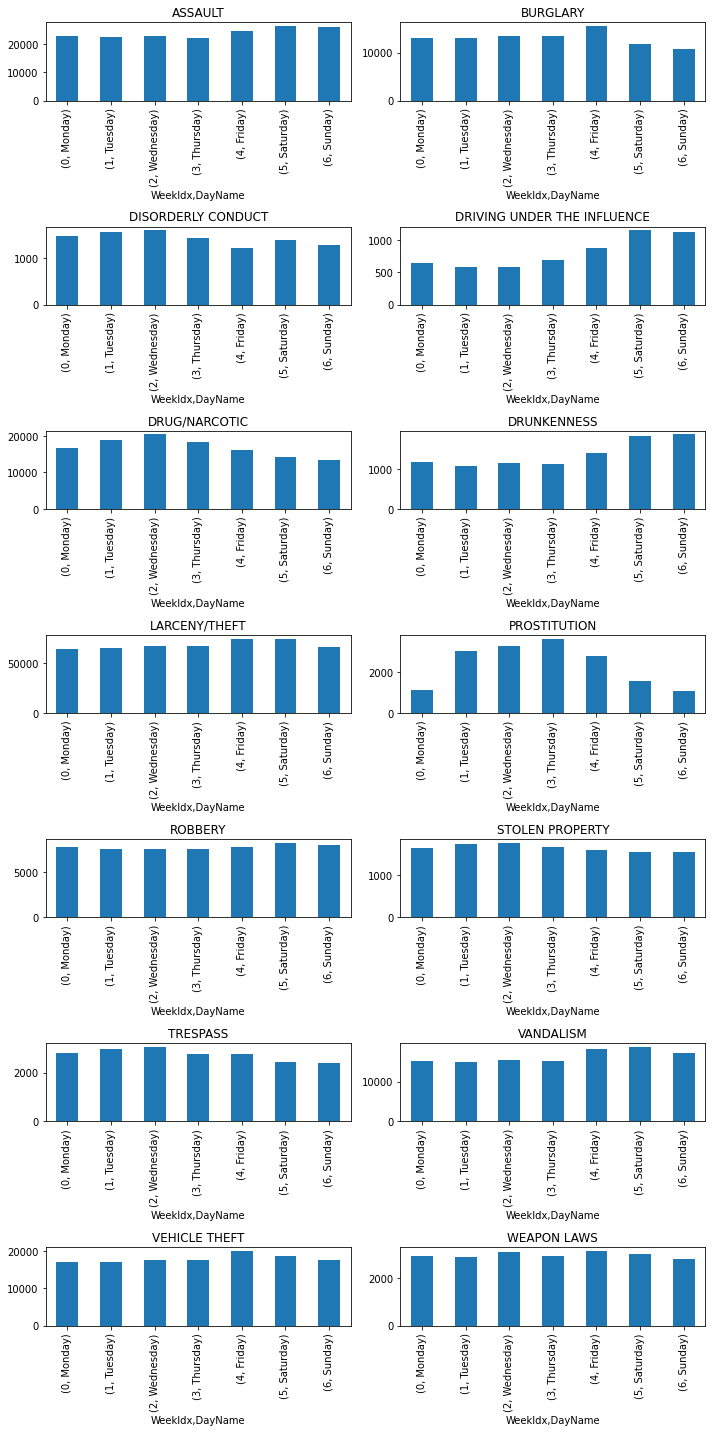

In [11]:
fig, axs = plt.subplots(7, 2, figsize=(10, 20))
for (idx, group), ax in zip(df[df.Category.isin(focuscrimes)].groupby("Category"), axs.flatten()): 
    group[["WeekIdx", "DayName"]]\
        .value_counts()\
        .sort_index()\
        .plot.bar(ax=ax, title=group.Category.values[0])

plt.tight_layout()

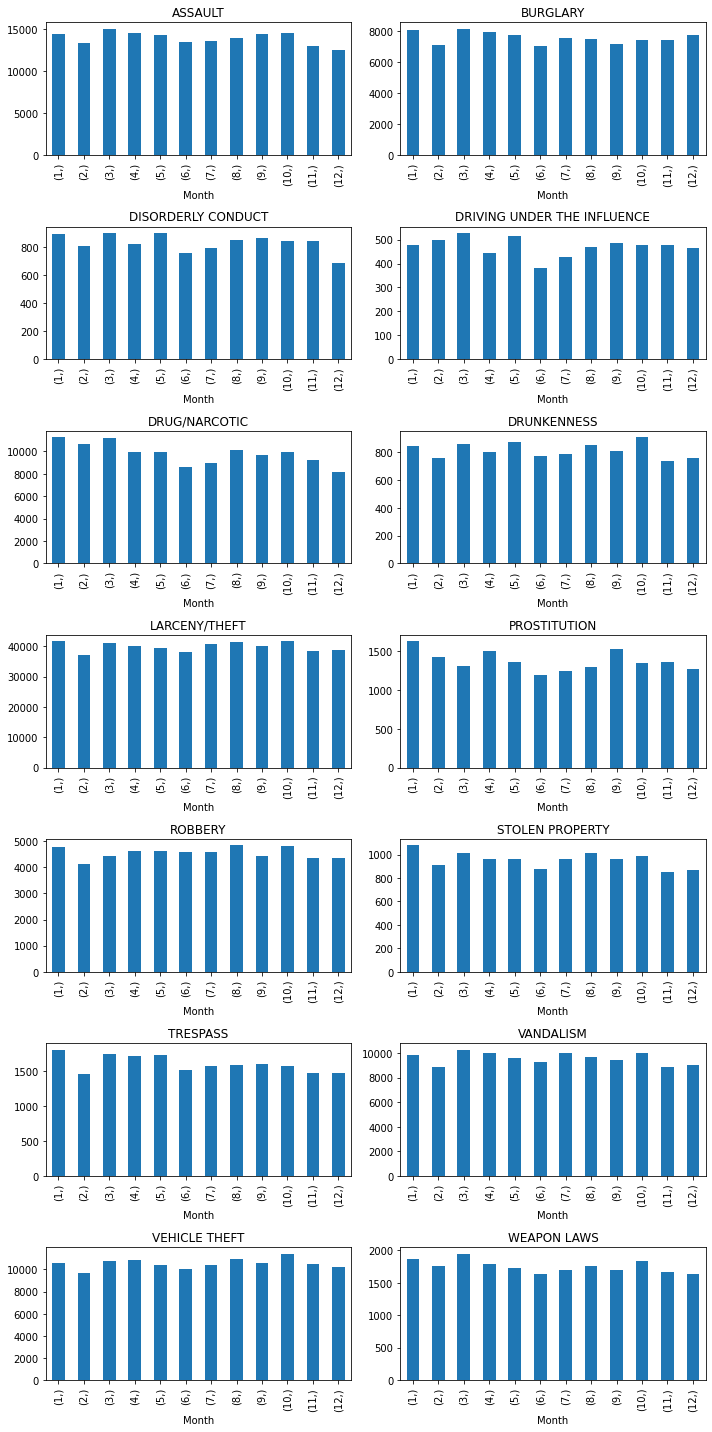

In [12]:
fig, axs = plt.subplots(7, 2, figsize=(10, 20))
for (idx, group), ax in zip(df[df.Category.isin(focuscrimes)].groupby("Category"), axs.flatten()): 
    val_counts = group[["Month"]]\
        .value_counts()\
        .sort_index()\
        .plot.bar(ax=ax, title=group.Category.values[0])

plt.tight_layout()

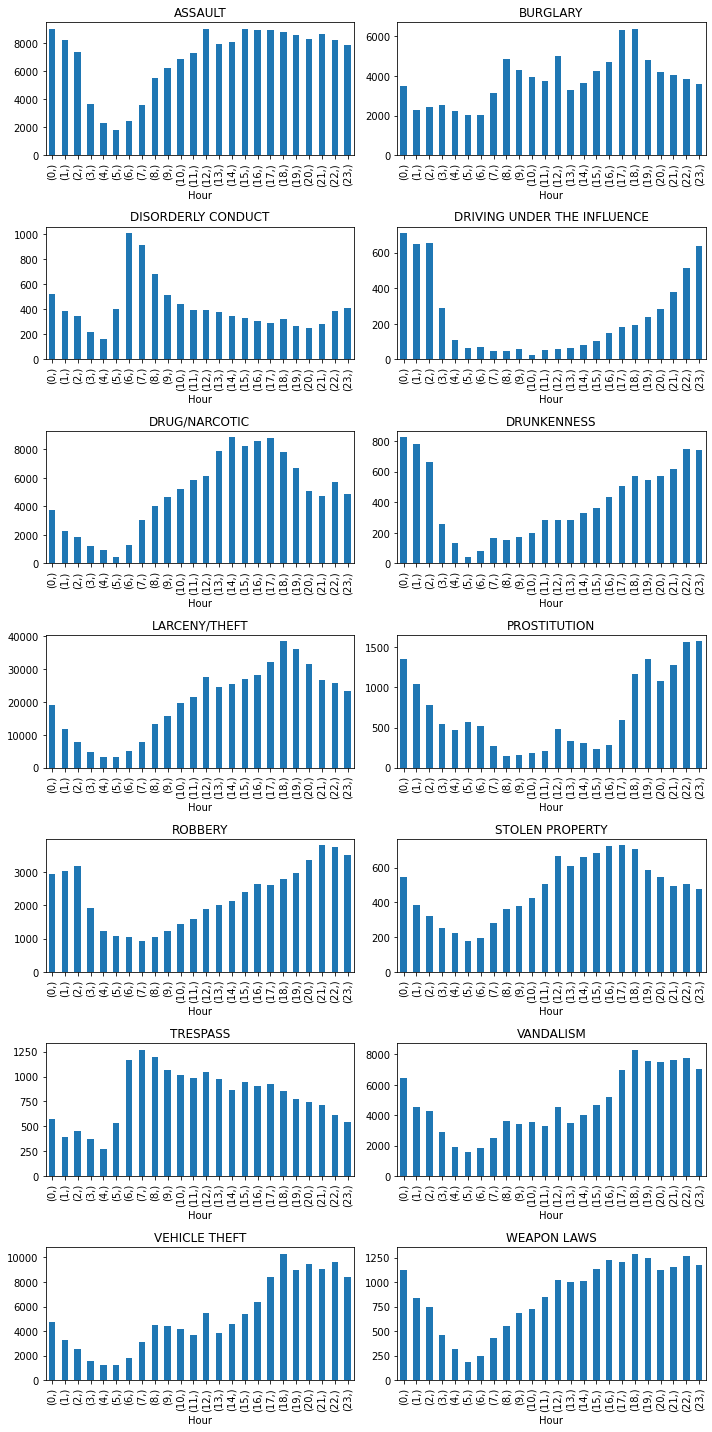

In [13]:
fig, axs = plt.subplots(7, 2, figsize=(10, 20))
for (idx, group), ax in zip(df[df.Category.isin(focuscrimes)].groupby("Category"), axs.flatten()): 
    val_counts = group[["Hour"]]\
        .value_counts()\
        .sort_index()\
        .plot.bar(ax=ax, title=group.Category.values[0])

plt.tight_layout()

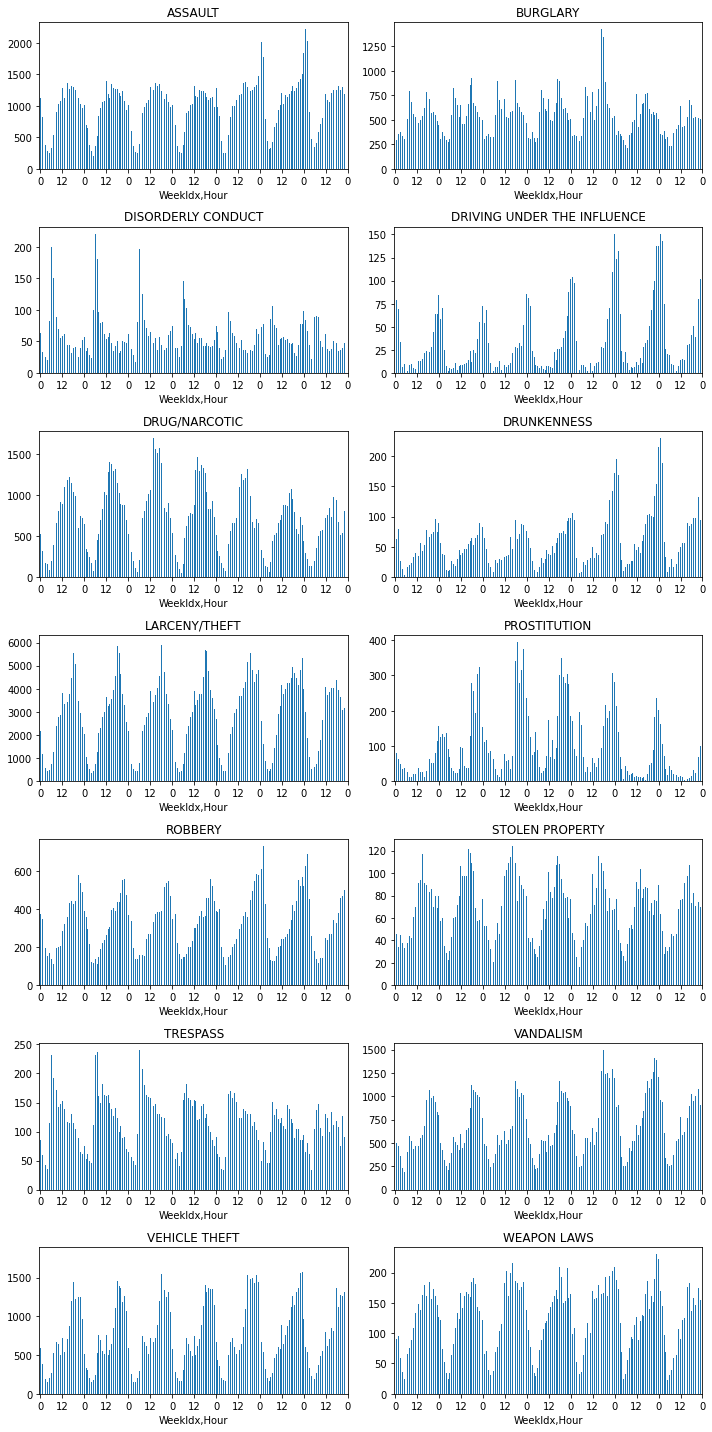

In [14]:
fig, axs = plt.subplots(7, 2, figsize=(10, 20))
for (_, group), ax in zip(df[df.Category.isin(focuscrimes)].groupby("Category"), axs.flatten()): 
    val_counts = group[["WeekIdx", "Hour"]]\
        .value_counts()\
        .sort_index()\
        .plot.bar(ax=ax, title=group.Category.values[0])
    ax.set_xticks([x for x in range(0, 169, 12)])
    ax.set_xticklabels([f"{x%24}" for x in range(0, 169, 12)], rotation=0)

plt.tight_layout()

In [15]:
print("10 Districts")
print(df.PdDistrict.unique())

10 Districts
['SOUTHERN' 'NORTHERN' 'CENTRAL' 'TARAVAL' 'BAYVIEW' 'MISSION' 'RICHMOND'
 'TENDERLOIN' 'INGLESIDE' 'PARK' nan]


In [16]:
print("Number of crimes in each district")
print(df.groupby("PdDistrict").size().sort_values(ascending=False))

print("Number of focus crimes")
print(df[df.Category.isin(focuscrimes)].groupby("PdDistrict").size().sort_values(ascending=False))

Number of crimes in each district
PdDistrict
SOUTHERN      390692
MISSION       288985
NORTHERN      266435
CENTRAL       221923
BAYVIEW       205480
TENDERLOIN    186954
INGLESIDE     181092
TARAVAL       155461
PARK          119698
RICHMOND      112804
dtype: int64
Number of focus crimes
PdDistrict
SOUTHERN      226805
NORTHERN      172194
MISSION       162971
CENTRAL       139961
BAYVIEW       112054
TENDERLOIN    104950
INGLESIDE     101328
TARAVAL        88132
PARK           67645
RICHMOND       66770
dtype: int64


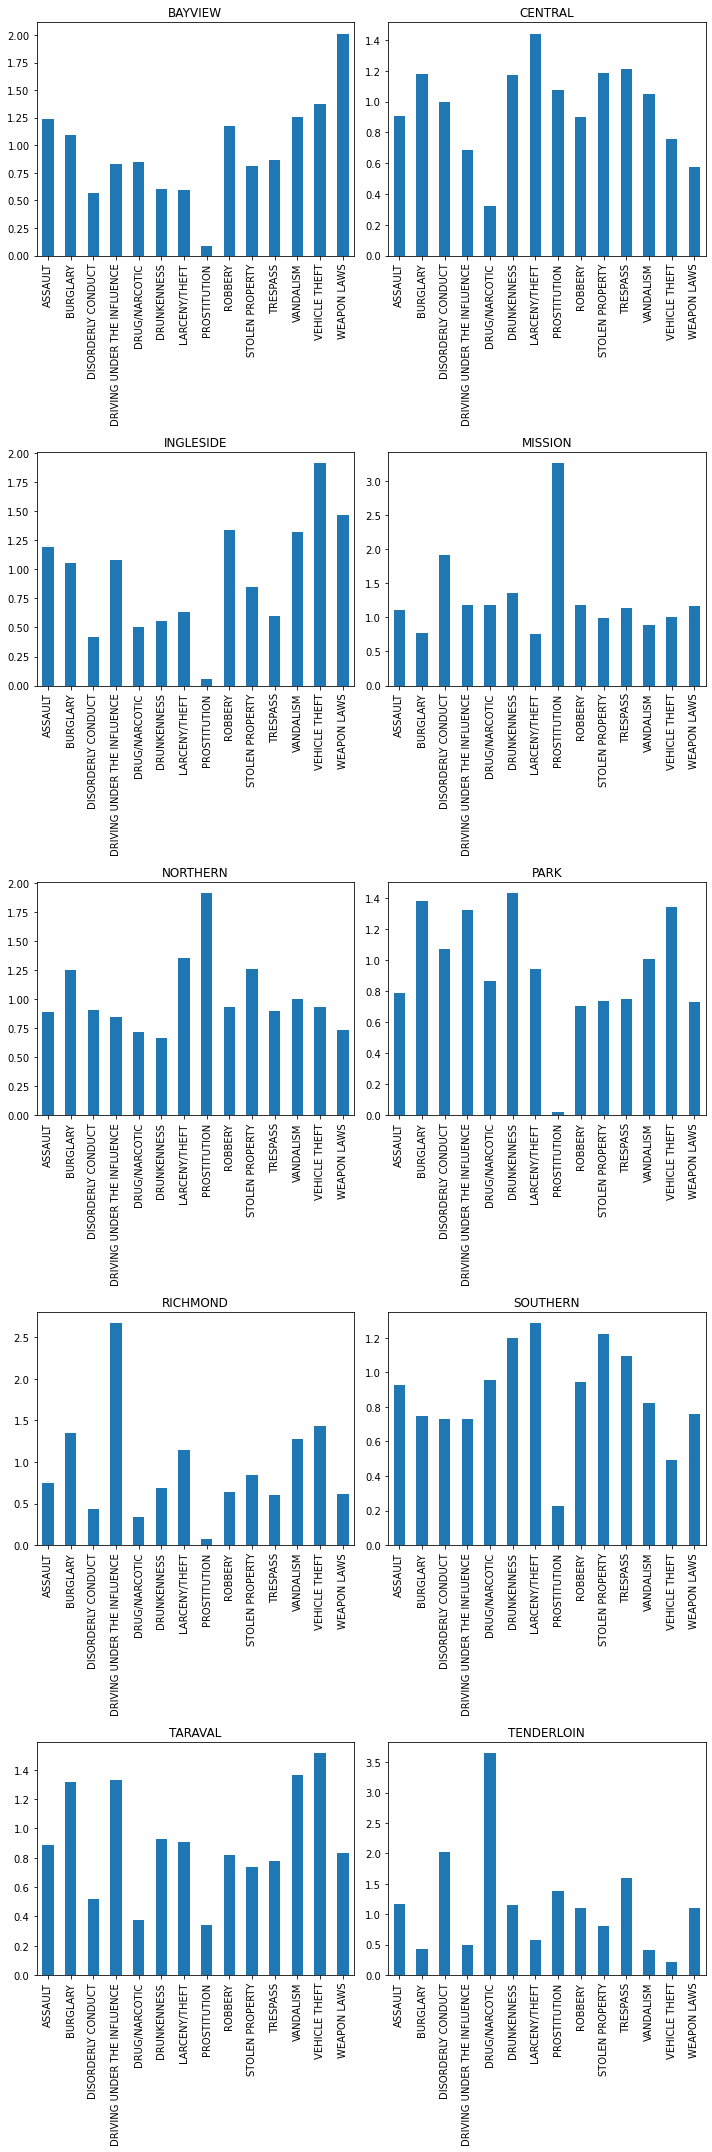

In [17]:
p_crime = df.Category.value_counts(normalize=True)
p_crime_districts = df.groupby("PdDistrict").Category.value_counts(normalize=True)

fig, axs = plt.subplots(5, 2, figsize=(10, 30))

for (area, new_df), ax in zip(p_crime_districts.groupby(level=0), axs.flatten()):
    new_df.index = new_df.index.get_level_values(1)
    ps = (new_df / p_crime)
    ps[ps.index.isin(focuscrimes)].plot.bar(title=area, ax=ax)

plt.tight_layout()

In [26]:
randomdata = {
    'CENTRAL': 0.8903601342256143,
    'SOUTHERN': 0.8642882941363439,
    'BAYVIEW': 0.925634097746596,
    'MISSION': 0.7369022697287458,
    'PARK': 0.9864113307070926,
    'RICHMOND': 0.5422239624697017,
    'INGLESIDE': 0.5754056712571605,
    'TARAVAL': 0.5834730737348696,
    'NORTHERN': 0.08148199528212985,
    'TENDERLOIN': 0.37014287986350447}

df_random = pd.DataFrame.from_dict(randomdata, orient="index").reset_index()
df_random.columns = ["DISTRICT", "DATA"]

# Normalizing between 0 and 12
df_random.DATA = df_random.DATA.transform(lambda x: (x / x.max()) * 12)
df_random

,DISTRICT,DATA
0,CENTRAL,10.831507
1,SOUTHERN,10.514335
2,BAYVIEW,11.260626
3,MISSION,8.964645
4,PARK,12.000000
5,RICHMOND,6.596323
6,INGLESIDE,6.999989
7,TARAVAL,7.098131
8,NORTHERN,0.991254
9,TENDERLOIN,4.502903


In [19]:
import json
import plotly.express as px

In [35]:
counties = json.loads(open("../files/sfpd.geojson", "r").read())

fig = px.choropleth_mapbox(df_random, geojson=counties, locations="DISTRICT", color="DATA", color_continuous_scale="Viridis", range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 37.773972, "lon": -122.431297},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'})
fig.show()

In [71]:
data = pd.DataFrame(df[(df.Category == "VEHICLE THEFT") & (df.WeekIdx == 1)].PdDistrict.value_counts(normalize=True)).reset_index()
data.columns = ["DISTRICT", "DATA"]
data.DATA = data.DATA.transform(lambda x: (x / x.max()) * 12)

In [72]:
counties = json.loads(open("../files/sfpd.geojson", "r").read())

fig = px.choropleth_mapbox(data, geojson=counties, locations="DISTRICT", color="DATA", color_continuous_scale="Viridis", 
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=10, center = {"lat": 37.773972, "lon": -122.431297},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'})
fig.show()